In [6]:
from oanquan_ai.oanquan import OAnQuan, Player, Move
import matplotlib.pyplot as plt
import numpy as np
from oanquan_ai import alpha_beta_v1, alpha_beta_v2

In [8]:
def get_ab_v1_move(game: OAnQuan, depth:int) -> Move:
    """Make move based on alpha-beta pruning."""
    maximizing = game.get_current_player() == Player.COMPUTER
    move = alpha_beta_v1.minimax(game, maximizing=maximizing, depth=depth)[1]
    assert move
    return move

def get_ab_v2_move(game: OAnQuan,depth:int) -> Move:
    """Make move based on alpha-beta pruning."""
    maximizing = game.get_current_player() == Player.COMPUTER
    move = alpha_beta_v2.minimax(game, maximizing=maximizing, depth=depth)[1]
    assert move
    return move

def simulate_games(num_games:int, depth:int, first_player:Player) -> tuple:
    ab_v1_wins = 0
    ab_v2_wins = 0
    draws = 0
    for i in range(num_games):
        print(f"Game {i} started")
        game = OAnQuan(turn=first_player.value)
        while not game.check_end():
            if game.get_current_player() == Player.PLAYER:
                move = get_ab_v1_move(game,depth)
            else:
                move = get_ab_v2_move(game,depth)
            game.make_move(move)
        print(f"Game {i} ended")
        if game.get_winner() == Player.PLAYER.name:
            ab_v1_wins += 1
        elif game.get_winner() == Player.COMPUTER.name:
            ab_v2_wins += 1
        else:
            draws += 1
    return ab_v1_wins, ab_v2_wins, draws

In [9]:
depths = np.arange(1, 7)
win_count = {
    "AlphaBetaV1": np.zeros(6),
    "AlphaBetaV2": np.zeros(6)
}

for index, depth in enumerate(depths):
    print(f"Depth: {depth}")
    print("AlphaBetaV1 first")
    ab_v1_wins, ab_v2_wins, _ = simulate_games(3, depth, Player.PLAYER)
    win_count["AlphaBetaV1"][index] = ab_v1_wins
    win_count["AlphaBetaV2"][index] = ab_v2_wins
    print("AlphaBetaV2 first")
    ab_v1_wins, ab_v2_wins, _ = simulate_games(3, depth, Player.COMPUTER)
    win_count["AlphaBetaV1"][index] += ab_v1_wins
    win_count["AlphaBetaV2"][index] += ab_v2_wins



Depth: 1
AlphaBetaV1 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
AlphaBetaV2 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
Depth: 2
AlphaBetaV1 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
AlphaBetaV2 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
Depth: 3
AlphaBetaV1 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
AlphaBetaV2 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
Depth: 4
AlphaBetaV1 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
AlphaBetaV2 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
Depth: 5
AlphaBetaV1 first
Game 0 started
Game 0 ended
Game 1 started
Game 1 ended
Game 2 started
Game 2 ended
AlphaBetaV2 first
Game 0 started
Game

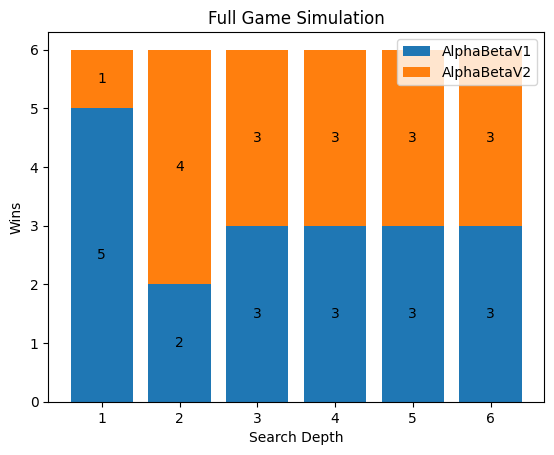

In [10]:
fig, ax = plt.subplots()
bottom = np.zeros(6)

for name, count in win_count.items():
    p = ax.bar(depths, count, label=name, bottom=bottom)
    bottom += count
    
    ax.bar_label(p, label_type='center')
    
ax.set_xlabel('Search Depth')
ax.set_ylabel('Wins')
ax.set_title('Full Game Simulation')
ax.legend()
plt.show()